# Sampling Theory

## Colophon

* The source code for this page is [dt_systems/1/sampling.ipynb](https://github.com/cpjobling/eg-247-textbook/blob/master/dt_systems/1/sampling.ipynb).

* You can view the notes for this presentation as a webpage ([HTML](https://cpjobling.github.io/eg-247-textbook/dt_systems/1/sampling.html)). 

* This page is downloadable as a [PDF](https://cpjobling.github.io/eg-247-textbook/dt_systems/1/sampling.pdf) file.

## Scope and Background Reading

This session is an introduction to sampling theory. It reviews the important ideas that pertain to sampling but leaves the detailed mathematics for your further study.

The material in this presentation and notes is based on Chapter 15 of {cite}`boulet` from the **Recommended Reading List** and you'll find the mathematical treatments there. There is much more detail in [Chapter 9](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?docID=3384197&ppg=329) of {cite}`karris` from the **Required Reading List**.

## Agenda

* Sampling of Continuous-Time Signals

* Signal Reconstruction

* Discrete-time Processing of Continuous-Time Signals

* Sampling of Discrete-Time Systems

## Acknowledgements

We will be using an adaptation of a pair of demo scripts to illustrate *alialising*. These scripts were published by Prof. Charles A. Bouman, School of Electrical and Computer Engineering, Purdue University as part of the course materials for [ECE438: Digital Signal Processing](https://engineering.purdue.edu/VISE/ee438/demos/).

## Introduction

* The *sampling process* provides the bridge between continuous-time (CT) and discrete-time (DT) signals
* Sampling records discrete values of a CT signal at periodic instants of time.
* Sampled data can be used in *real-time* or *off-line* processing
* Sampling opens up possibility of processing CT signals through *finite impulse response* (FIR) and *infinite impulse response* (IIR) filters.

Basic set up

### In Class Demo 1: Sampling

I need a volunteer to provide a sound sample ....

1. I will use this [Live Script](https://uk.mathworks.com/help/matlab/matlab_prog/what-is-a-live-script-or-function.html) [sampling_demo.mlx](https://cpjobling.github.io/eg-247-textbook/dt_systems/1/matlab/sampling_demo.mlx) to sample your voice.
2. I will then playback the recording.
3. I will the plot the data.

In [1]:
clearvars
format compact
cd matlab
pwd

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eg-247-textbook/dt_systems/1/matlab'


In [2]:
open sampling_demo

#### Technical Details

* **Sampling rate**: 8000 samples per second (fs = 8 kHz)
* **Resolution**: 8 bits per sample
* **Channels**: 1 channel. 
* **Reconstruction**: Matlab plays the audio back at 8192 samples per second.

#### Question

What will the bit-rate be for playback?

<pre style="border: 2px solid blue">





</pre>

## Sampling CT Signals

What is going on here?

### Time domain

Sampling can be modelled as the multiplication of a continuous-time signal by a sequence of periodic impulses as illustrated here.

![Time domain view of sampling](./pictures/sampling.png)

This is a form of **modulation**

$T_s$ is the period of the periodic sampling function.

### Frequency domain

Multiplication in the time domain is *convolution* in the frequency domain

![Frequency domain view of sampling](./pictures/sampling_fr.png)

$\omega_s$ is the frequency of the periodic sampling function = $2\pi/T_s$.

### The Mathematics

**The Sampled signal**:

$${x_s}(t) = \sum\limits_{k =  - \infty }^{ + \infty } {x(k{T_s})\delta (t - k{T_s})} $$

**Frequency convolution**:

$$
  {X_s}(\omega ) = \frac{1}{T_s}\int_{ - \infty }^{ + \infty } {X(\upsilon )} \sum\limits_{k =  - \infty }^{ + \infty } {\delta (t - \upsilon  - k{\omega _s})} \,d\upsilon
$$

**Sampling property**:

$${X_s}(\omega ) = \frac{1}{T_s}\int_{ - \infty }^{ + \infty } {\sum\limits_{k =  - \infty }^{ + \infty } {X(\omega  - k{\omega _s})} } \delta (t - \upsilon  - k{\omega _s})\,d\upsilon $$

**Sifting property**:

$${X_s}(\omega ) = \frac{1}{T_s}\sum\limits_{n =  - \infty }^{ + \infty } {X(\omega  - k{\omega _s})}$$

### Nyquist-Shannon Sampling Theorem

Gives a sufficient condition to recover a continuous time signal from its samples $x(nT_s)$, $n$ is an integer.

**Sampling Theoreom**

Let $x(t)$ be a band-limited signal with $X(\omega) = 0$ for $|\omega|>\omega_M$.

Then $x(t)$ is uniquely determined by its samples $x(nT_s)$, $-\infty <n < +\infty$ if

$$\omega_s > 2\omega_M,$$

where $\omega_s = 2\pi/T_s$ is the sampling frequency.

### Recovery of signal by filtering

![Recovery of signal by filtering](pictures/recovery.png)

### Recovered signal

![Recovered signal](./pictures/recovered.png)

### Ideal Lowpass Filter for CT Recovery from DT Sampled Signal

![Ideal Lowpass Filter for CT Recovery from DT Sampled Signal](./pictures/recover-lp.png)

This is of course theoretical only!

### Sample-and-hold

![Sample and hold](./pictures/sandh.png)

### Sample-and-hold operator

![Sample-and-hold operator](./pictures/zoh.png)

### In Class Demo 2

#### Illustrating Sampling in MATLAB

In [3]:
w0 = 1;        % fundamental frequency rad/s
t0=2*pi/w0;    % period s
tmax = 1.5*t0; % plottable range

#### Define a suitable signal
We will use a system with an underdamped second-order response.

The transfer function is:
$$H(s) = \frac{\omega_0^2}{s^2 + 2\zeta\omega_0 s + \omega_0^2}$$

In [4]:
syms s t
zeta = 0.3;
H = w0^2/(s^2 + 2*zeta*w0*s + w0^2)

H =


1/(s^2 + (3*s)/5 + 1)


#### Calculate and plot the impulse response

In [5]:
h = ilaplace(H)

h =


(10*91^(1/2)*exp(-(3*t)/10)*sin((91^(1/2)*t)/10))/91


In [6]:
t = linspace(0,tmax,100);
xc = eval(h); % eval evaluates a symbolic expression as a MATLAB command.
tc = t;

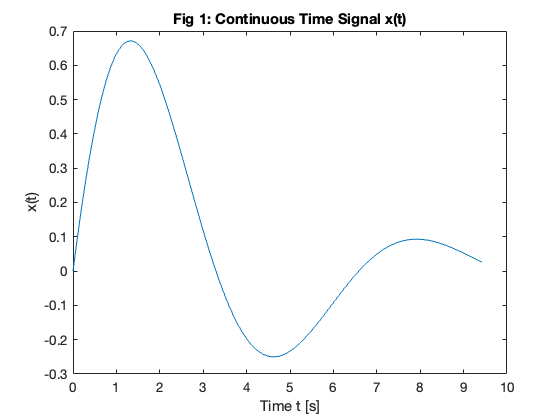

In [7]:
plot(tc,xc)
title('Fig 1: Continuous Time Signal x(t)')
ylabel('x(t)')
xlabel('Time t [s]')

You can generate all the images in this presentation by running the Matlab script: [sampling.m](https://cpjobling.github.io/eg-247-textbook/dt_systems/1/matlab/sampling.m) which is also available as a Live Script [sampling.mlx](https://cpjobling.github.io/eg-247-textbook/dt_systems/1/matlab/sampling.mlx).

#### Calculate and plot the sampled data

In [8]:
ws = 4*w0; % twice minimum!
Ts = (2*pi)/ws;
t = 0:Ts:tmax;
xs = eval(h);
td = t;

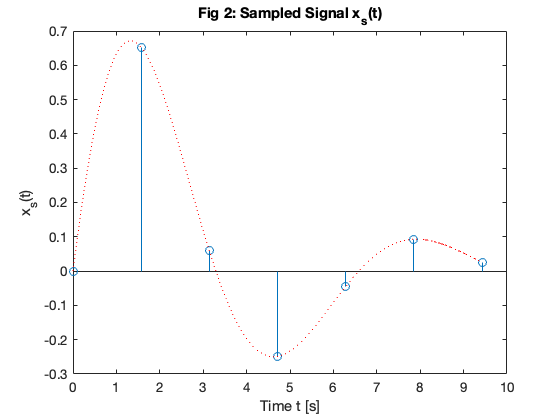

In [9]:
stem(td,xs)
hold on
plot(tc,xc,'r:')
hold off
title('Fig 2: Sampled Signal x_s(t)')
ylabel('x_s(t)')
xlabel('Time t [s]')

#### Notes

The sampled signal $x_0(t)$ carries the same information as the samples themselves, so we should be able to recover the entire signal $x(t)$.

From the block diagram of the sample-and-hold operator, what we would need to do is find the inverse of the ZOH system with impulse response $h_0(t)$ and then use a perfect lowpass filter.

The frequency response $H_0(\omega)$ is given by the usual sinc function for an even rectangular pulse signal, multiplied by $e^{-j\omega T_s/2}$ because we need a time delay of $T_s/2$ to make the signal causal:

$${H_0}(\omega ) = {T_s}{e^{ - j\omega {T_s}/2}}\frac{\sin \left( {\pi \frac{T_s}{2\pi }\omega } \right)}{\pi \frac{T_s}{2\pi}\omega } = 2{e^{ - j\omega {T_s}/2}}\frac{\sin \left( {\omega {T_s}/2} \right)}{\omega }$$

The inverse of $H_0(\omega)$ is given by

$${H_1}(\omega ) = {H^{ - 1}}(\omega ) = \frac{1}{2}{e^{j\omega \frac{T_s}{2}}}\frac{\omega }{\sin \left( {\frac{T_s}{2}\omega } \right)}$$

The *reconstruction filter* is the cascade of the inverse filter and the lowpass filter:

$$H_r(\omega)=T_sH_{\mathrm{lp}}(\omega)H_1(\omega)$$

![Reconstruction filter](./pictures/reconstruction_filter.png)

The frequency response of this filter and additional notes are to be found on Page 546 of {cite}`boulet`.

## Signal Reconstruction

**Problem**

* We have a bandlimited signal that is sampled at the Nyquist-Shannon sampling frequency $\omega_s = 2\pi/T_s$.
* We therefore have a discrete-time (DT) signal $x(nT_s)$ from which we want to reconstruct the original signal.

### Perfect Signal Interpolation Using sinc Functions

* In the *frequency domain*, the ideal way to reconstruct the signal would be to construct a chain of impulses $x_s(t)$ and then to filter this signal with an ideal lowpass filter.

* In the *time domain*, this is equivalent to interpolating the samples using time-shifted sinc functions with zeros at $nT_s$ for $\omega_c = \omega_s$.

### In Class Demo 3: MATLAB Demonstrations of signal reconstruction

 #### Reconstruction with sinc function

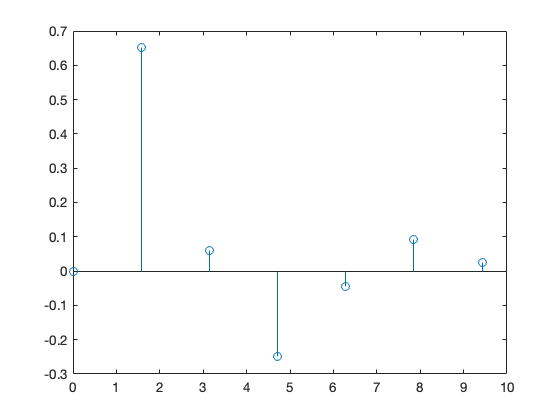

In [10]:
stem(td,xs)
hold on

In [11]:
x = zeros(length(td),length(tc));
for k=1:length(td)
    xk = xs(k);
    sincx = xk*sin(pi*(tc - td(k))/Ts)./(pi*(tc - td(k))/Ts);
    x(k,:) = sincx;
end

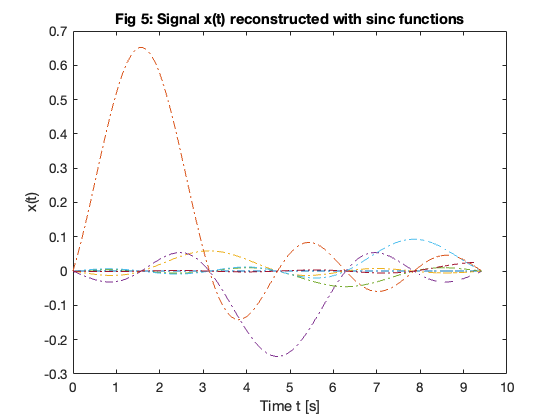

In [12]:
plot(tc,x,'-.')
hold off
title('Fig 5: Signal x(t) reconstructed with sinc functions')
ylabel('x(t)')
xlabel('Time t [s]')

Each impulse in $x_s(t)$ triggers the impulse reponse of the lowpass filter (the sinc signal), the resulting signal $x(t)$ at the output of the filter is the sum of all these time-shifted sinc signals with amplitudes equal to the samples $x(nT_s)$.

$$x(t) = \sum\limits_{k =  - \infty }^{ + \infty } {x(n{T_s}){\rm{sinc}}} \left( {\frac{t - n{T_s}}{T_s}} \right)$$

(Note we have defined ${\rm{sinc}}(x)$ as $\sin(\pi x)/(\pi x)$.)

#### Reconstructed signal
Obtained by summing all the sinc functions

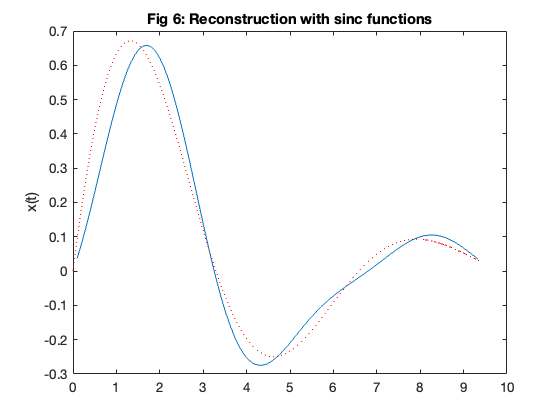

In [13]:
plot(tc,sum(x),tc,xc,'r:')
title('Fig 6: Reconstruction with sinc functions')
ylabel('x(t)')

This is clearly unfeasible, at least in real-time, so we have to resort to approximations of the ideal low-pass filter. 

A couple of examples are given below. Boulet gives more information including an evaluation of the quality of the approximation.

In practice, the zero-order-hold is often used in practice and a low-pass filter with a flat passband (such as the Butterworth filter discussed in the last lecture) would be used. In audio applications, for example, the low-pass nature of speakers and the human ear add additional smoothing. For non HiFi applications (e.g. an MP3 player), this may be all that is actually used!

#### Signal reconstructed with zero-order hold (ZOH)

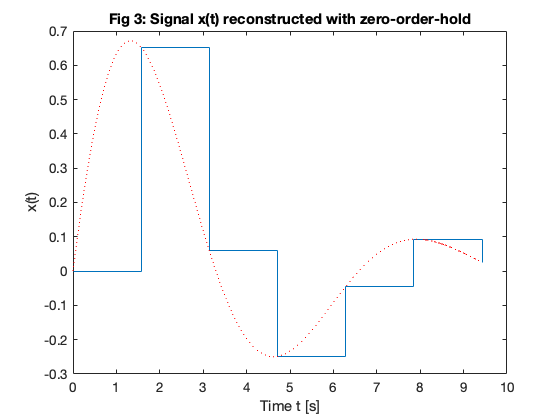

In [14]:
stairs(td,xs)
hold on
plot(tc,xc,'r:')
title('Fig 3: Signal x(t) reconstructed with zero-order-hold')
ylabel('x(t)')
xlabel('Time t [s]')

#### Signal reconstructed with First-order hold (FOH)

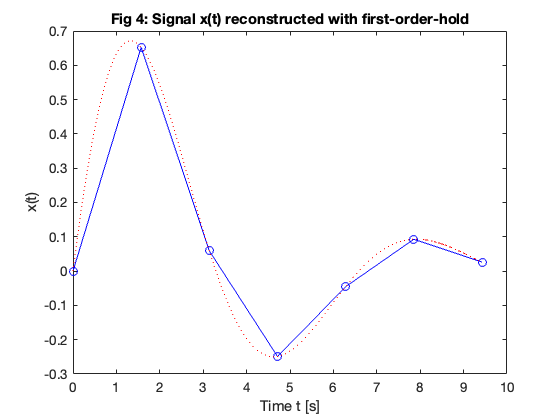

In [15]:
plot(td,xs,'bo-',tc,xc,'r:')
title('Fig 4: Signal x(t) reconstructed with first-order-hold')
ylabel('x(t)')
xlabel('Time t [s]')

## Aliasing

* Aliasing Occurs when the sampling frequency is too low to ovoid overlapping between the spectra.

* When aliasing occours, we have violated the sampling theorem: that is $\omega_s < 2\omega_m$.

* When aliasing occurs, the original signal cannot be recovered by lowpass filtering.

### An Aliased Signal

![An aliased signal](./pictures/aliasing.png)

### In Class Demo 4

#### Demo 4.1

We use the recording made at the start and run it through a script that effectively aliases the original signal be reducing the sampling frequency to less than half the original sampling frequency.

Here's the script: [aliaseg1.mlx](https://cpjobling.github.io/eg-247-textbook/dt_systems/1/matlab/aliaseg1.mlx) that I'll be using. (Also available as an m-file [aliaseg1.m](https://cpjobling.github.io/eg-247-textbook/dt_systems/1/matlab/aliaseg1.m))

In [16]:
open aliaseg1

#### Demo  4.2

Assume signal $x(t)=\cos(\omega_0 t)$ is sampled at a rate of $\omega_s = 1.5\omega_0$, violating the sampling theorem.

In [17]:
open aliasing

We can see the effect on the plot below:

![An example of Aliasing](./pictures/aliasing_ex.png)

Image generated by [aliasing.mlx](https://cpjobling.github.io/eg-247-textbook/dt_systems/1/matlab/aliasing.mlx) (Also available as [aliasing.m](https://cpjobling.github.io/eg-247-textbook/dt_systems/1/matlab/aliasing.m)).

You should confirm for yourself that after lowpass filtering the spectrum with a filter with cutofff frequency $\omega_c = \omega_s/2$ that the signal returned is the spectrum of $x(t)=\cos(\omega_0 t/2)$

### Antialising Filters

* Most real signals are not band-limited so we have to artificially make them bandlimited  using an *anti-aliasing filter*.

* An anti-aliasing filter is a low-pass filter whose cutoff frequency is lower than half the sampling frequency.

* This can produce some distortion at high-frequencies but this is often better than the distortion that would occur at low frequencies if aliasing was allowed to happen.

* For more on this topic see Pages 551&mdash;552 of Boulet.

#### Demo 4.3

This example uses anti-aliasing to downsample the audio. You should hear that the sound is less distorted as we sample below the sampling frequency of 8 kHz.

Script: [aliaseg2.mlx](https://cpjobling.github.io/eg-247-textbook/dt_systems/1/matlab/aliaseg2.mlx) (Also available as an m-file [aliaseg2.m](https://cpjobling.github.io/eg-247-textbook/dt_systems/1/matlab/aliaseg2.m))

In [18]:
open aliaseg2

### Practical application - digital audio

Human beings can hear sounds with frequencies up to around 20 kHz so when recording music in the modern sound studio (or phone or PC for that matter) the audio signal is antialiased with a 22 kHz filter. The signal is then sampled at 44.1 kHz before being stored for later processing and/or playback.

## DT Processing of CT Signals

![DT Processing of CT Signals](./pictures/ct-to-dt.png)

The concepts presented in this session provide a model that allows us to cross the bridge between the theoretical concept of impulse chain sampling through to a representation of a signal as discrete sequence $x[n]$ (to be introduced next lecture) and back to a continuous-time signal via reconstruction.

The mathematics predicts the nature of the signals that are processed in the ideal case, but we will leave it with you to study these for yourself. (See Boulet pp 552&mdash;557).

In practice, modern digital processing relies on the use of an analogue-to-digital converter (ADC) (which also introduces amplitude quantization), finite-length arithmetic inside the discrete-time system (usually a microprocessor, microcontroller or digital signal processor), followed by conversion back to a step-wise continuous signal via a digital to analogue converter (DAC) that operates like a zero-order-hold.

## Sampling of DT Signals

* In modern signal processing and digital communications many of the operations that were once done in continuous time are now done entirely in discrete time.

* For example, we can implement sampling and modulation in discrete time.

* We can also upsample (interpolate between samples) or downsample (reduce the number of samples in a discrete-time signal)

These topics are left to you for further study.

## Summary

* Sampling of Continuous-Time Signals
* Signal Reconstruction
* Aliasing
* Discrete-time Processing of Continuous-Time Signals
* Sampling of Discrete-Time Systems

*Next session*

* The Z-Transform

### Answer to Question

bit rate = [number of samples per second] x [number of bits per sample] x [number of channels]

bit rate = $8192 \times 8 \times 1$ bits/second [baud]

bit rate = $65,536$ bits/second

## References

See [Bibliography](/zbib).

## Matlab Functions used

* The matlab recorder command is: `recorder = audiorecorder(Fs,nBits,nChannels);`
* Sound is recorded using: `recordblocking(recObj, time);`
* Recorded sound is played back: `play(recorder);`
* Sound is extracted as Matlab data using: `x = getaudiodata(recorder);`
* Sound is plotted against sample number using: `plot(x)`
* I extracted 50 points for the stem plot using `stem([1000:1049],myRecording(1000:1049))`
* Sound is saved as an audio file using: `audiowrite(audioFile,myRecording,Fs);` where `audiofile` is a filename in form `name.extension`. Supported extensions are `'.wav'`, `'.ogg'`, and `'.flac'` on all platforms. Windows and Mac support `'.m4m'` and '`.mp4`'. 
* Sound is loaded using `[x,Fs]=audioread(audioFile);`. Additional file formats are supported for reading including `'.mp3'`.
* Frequency response spectra were generated using the fast Fourier transform (`fft`) function.
* Multiple graphs in one figure window is achieved using `subplot`.

For more information use `doc` *command* from the command-line.